In [3]:
import numpy as np 
import pandas as pd
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [33]:
%run ./DataGen2.ipynb

# Ce notebook compare les méthodes graphic, Voronoi, Tomato, et DB-scan. 
 Il lit les résutlats de Tomato et de Voronoi dans les dossiers SRT_analysis et Tomato_analysis, mais crée lui-même les résutlats de graphic et de DB-scan. Ansi, les résutlats de graphic et de DB-scan ne sont pas enregistrés dans des dossiers, mais leurs analyses de l'images sont immédiatement interpértées et traitées par le notebook (FMI, nombre de clusters, nombre de loc per cluster.)

In [31]:
GT = pd.read_csv(path + 'Data/standard/simulated_SMLM_1_0.csv')

,x,y,labels_1,sigma,N_photons,cov_matrix
0,774.132777,3698.445655,1,19.073448,150.0,"[[363.79643425885024, 0], [0, 363.796434258850..."
1,737.727181,3638.100638,1,24.638480,150.0,"[[607.0546739977143, 0], [0, 607.0546739977143]]"
2,801.034153,3656.952111,1,15.635927,150.0,"[[244.4822021042119, 0], [0, 244.4822021042119]]"
3,787.398430,3624.356494,1,21.637043,150.0,"[[468.1616387080229, 0], [0, 468.1616387080229]]"
4,805.259117,3675.032411,1,15.213736,150.0,"[[231.45776309048685, 0], [0, 231.457763090486..."
...,...,...,...,...,...,...
1915,3603.428700,2097.001260,0,19.785264,150.0,"[[391.4566736016968, 0], [0, 391.4566736016968]]"
1916,1144.725875,1992.950875,0,19.012283,150.0,"[[361.4669171541754, 0], [0, 361.4669171541754]]"
1917,1638.614843,1406.869673,0,18.704047,150.0,"[[349.8413817473289, 0], [0, 349.8413817473289]]"
1918,423.618937,210.980774,0,13.158830,150.0,"[[173.15480261697536, 0], [0, 173.154802616975..."


In [41]:
help(calling_graphic)

Help on function calling_graphic in module __main__:

calling_graphic(data, sigma_s=30.0, noise_thresh=0.5)



In [32]:
voronoi = pd.read_csv(path + method_folder + 'voronoi_result_' + str(ID)+ '_'+ str(0) +'.csv', index_col = 0)

,x
1,0
2,0
3,1
4,1
5,1
...,...
1916,0
1917,0
1918,0
1919,0


In [39]:
tomato = pd.read_csv(path + 'Tomato_analysis/' + 'tomato_result_' + str(ID)+ '_'+ str(0) +'.csv', index_col = 0)

,x
1,1
2,1
3,1
4,1
5,1
...,...
1916,0
1917,0
1918,0
1919,0


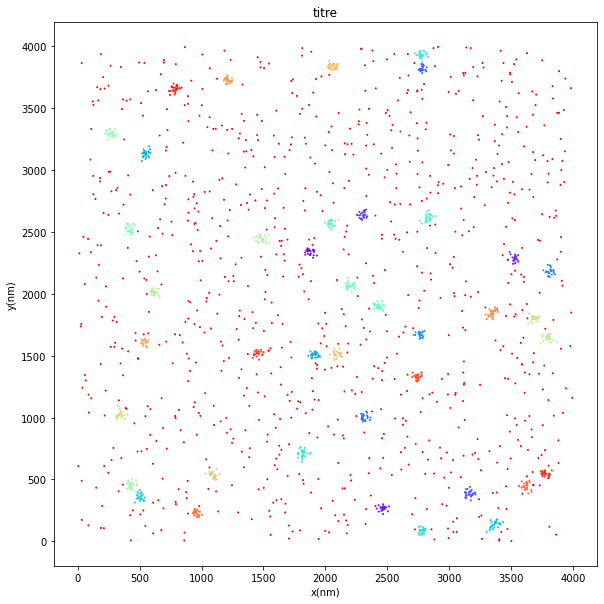

In [40]:
Ps = GT[['x', 'y']].to_numpy()
plot_points(Ps, tomato['x'].to_numpy(), 'titre', s= 1)

In [35]:
help(plot_points)

Help on function plot_points in module __main__:

plot_points(P, labels, plot_tile, s)



In [4]:
path = '/Users/Eliana/Documents/PDM/Codes/My_codes/Deviations_from_standard/'

In [5]:
ID = 1
method_folder = 'SRT_analysis/'
configuration_folder = 'standard/'

In [28]:
#data = pd.read_csv(path + method_folder + 'voronoi_result_' + str(ID)+ '_'+ str(i) +'.csv')
data = pd.read_csv(path + method_folder + 'voronoi_result_' + str(ID)+ '_'+ str(29) +'.csv', index_col = 0)

In [89]:
FMI_tomato_1 = []
for i in range(30):
    data = pd.read_csv(path + 'standard/simulated_SMLM_' + str(ID)+ '_'+ str(i) +'.csv')

    truelabels = data['labels_1'].to_numpy()
    tomato_labels = pd.read_csv(path + 'tomato_results/tomato_result_' + str(ID)+ '_'+ str(i) +'.csv')['x'].values
    res_FMI = metrics.fowlkes_mallows_score(truelabels, tomato_labels)
    FMI_tomato_1.append(res_FMI)

In [90]:
FMI_graphic_1 = []
for i in range(30):
    data = pd.read_csv(path + 'standard/simulated_SMLM_' + str(ID)+ '_'+ str(i) +'.csv')

    truelabels = data['labels_1'].to_numpy()
    graphic_labels = pd.read_csv(path + 'graphic_results/graphic_result_' + str(ID)+ '_'+ str(i) +'.csv',
                                 usecols= ['graphic_labels'])['graphic_labels'].to_numpy()
    res_FMI = metrics.fowlkes_mallows_score(truelabels, graphic_labels)
    FMI_graphic_1.append(res_FMI)

In [92]:
ID = 2

In [93]:
path = '/Users/Eliana/Documents/PDM/Codes/My_codes/Data/'

FMI_tomato_2 = []
for i in range(30):
    data = pd.read_csv(path + 'low_density/simulated_SMLM_' + str(ID)+ '_'+ str(i) +'.csv')

    truelabels = data['labels_1'].to_numpy()
    tomato_labels = pd.read_csv(path + 'tomato_results/tomato_result_' + str(ID)+ '_'+ str(i) +'.csv')['x'].values
    res_FMI = metrics.fowlkes_mallows_score(truelabels, tomato_labels)
    FMI_tomato_2.append(res_FMI)

In [94]:
FMI_graphic_2 = []
for i in range(30):
    data = pd.read_csv(path + 'low_density/simulated_SMLM_' + str(ID)+ '_'+ str(i) +'.csv')

    truelabels = data['labels_1'].to_numpy()
    graphic_labels = pd.read_csv(path + 'graphic_results/graphic_result_' + str(ID)+ '_'+ str(i) +'.csv',
                                 usecols= ['graphic_labels'])['graphic_labels'].to_numpy()
    res_FMI = metrics.fowlkes_mallows_score(truelabels, graphic_labels)
    FMI_graphic_2.append(res_FMI)

In [96]:
ID = 3

In [97]:
path = '/Users/Eliana/Documents/PDM/Codes/My_codes/Data/'

FMI_tomato_3 = []
for i in range(30):
    data = pd.read_csv(path + 'high_noise/simulated_SMLM_' + str(ID)+ '_'+ str(i) +'.csv')

    truelabels = data['labels_1'].to_numpy()
    tomato_labels = pd.read_csv(path + 'tomato_results/tomato_result_' + str(ID)+ '_'+ str(i) +'.csv')['x'].values
    res_FMI = metrics.fowlkes_mallows_score(truelabels, tomato_labels)
    FMI_tomato_3.append(res_FMI)

In [98]:
FMI_graphic_3 = []
for i in range(30):
    data = pd.read_csv(path + 'high_noise/simulated_SMLM_' + str(ID)+ '_'+ str(i) +'.csv')

    truelabels = data['labels_1'].to_numpy()
    graphic_labels = pd.read_csv(path + 'graphic_results/graphic_result_' + str(ID)+ '_'+ str(i) +'.csv',
                                 usecols= ['graphic_labels'])['graphic_labels'].to_numpy()
    res_FMI = metrics.fowlkes_mallows_score(truelabels, graphic_labels)
    FMI_graphic_3.append(res_FMI)

In [102]:
ID = 4

In [103]:
path = '/Users/Eliana/Documents/PDM/Codes/My_codes/Data/'

FMI_tomato_4 = []
for i in range(30):
    data = pd.read_csv(path + 'different_densities/simulated_SMLM_' + str(ID)+ '_'+ str(i) +'.csv')

    truelabels = data['labels_1'].to_numpy()
    tomato_labels = pd.read_csv(path + 'tomato_results/tomato_result_' + str(ID)+ '_'+ str(i) +'.csv')['x'].values
    res_FMI = metrics.fowlkes_mallows_score(truelabels, tomato_labels)
    FMI_tomato_4.append(res_FMI)

In [105]:
FMI_graphic_4 = []
for i in range(30):
    data = pd.read_csv(path + 'different_densities/simulated_SMLM_' + str(ID)+ '_'+ str(i) +'.csv')

    truelabels = data['labels_1'].to_numpy()
    graphic_labels = pd.read_csv(path + 'graphic_results/graphic_result_' + str(ID)+ '_'+ str(i) +'.csv',
                                 usecols= ['graphic_labels'])['graphic_labels'].to_numpy()
    res_FMI = metrics.fowlkes_mallows_score(truelabels, graphic_labels)
    FMI_graphic_4.append(res_FMI)

standard


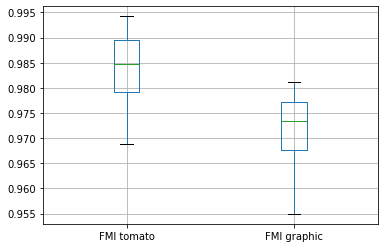

In [91]:
df1 = pd.DataFrame(FMI_tomato_1, columns = ['FMI tomato'])
df1['FMI graphic'] = FMI_graphic_1
print('standard')
boxplot = df1.boxplot()

low density


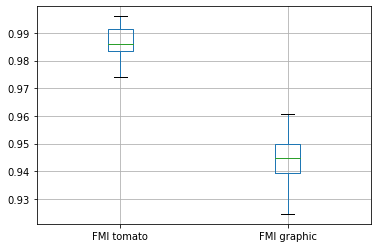

In [95]:
df2 = pd.DataFrame(FMI_tomato_2, columns = ['FMI tomato'])
df2['FMI graphic'] = FMI_graphic_2
print('low density')
boxplot = df2.boxplot()

different densities


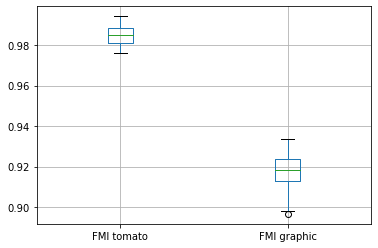

In [106]:
df4 = pd.DataFrame(FMI_tomato_4, columns = ['FMI tomato'])
df4['FMI graphic'] = FMI_graphic_4
print('different densities')
boxplot = df4.boxplot()

higher nosie level


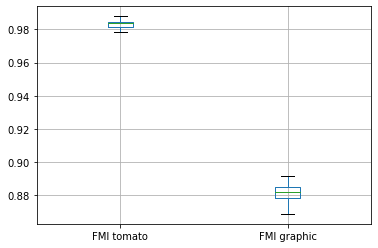

In [99]:
df3 = pd.DataFrame(FMI_tomato_3, columns = ['FMI tomato'])
df3['FMI graphic'] = FMI_graphic_3
print('higher nosie level')
boxplot = df3.boxplot()

In [5]:
ID = 2

In [6]:
path = '/Users/Eliana/Documents/PDM/Codes/My_codes/Data/'
data = pd.read_csv(path + 'simulated_SMLM_' + str(ID)+ '.csv')

truelabels = data['labels_1'].to_numpy()
tomato_labels = pd.read_csv(path + 'tomato_result_' + str(ID) + '.csv')['x'].values

In [7]:
res_FMI = metrics.fowlkes_mallows_score(truelabels, tomato_labels)
print(res_FMI)

0.9859063734647504


In [9]:
ID = 3

In [10]:
path = '/Users/Eliana/Documents/PDM/Codes/My_codes/Data/'
data = pd.read_csv(path + 'simulated_SMLM_' + str(ID)+ '.csv')

truelabels = data['labels_1'].to_numpy()
tomato_labels = pd.read_csv(path + 'tomato_result_' + str(ID) + '.csv')['x'].values

In [11]:
res_FMI = metrics.fowlkes_mallows_score(truelabels, tomato_labels)
print(res_FMI)

0.9808769419924483


In [12]:
ID = 4

In [13]:
path = '/Users/Eliana/Documents/PDM/Codes/My_codes/Data/'
data = pd.read_csv(path + 'simulated_SMLM_' + str(ID)+ '.csv')

truelabels = data['labels_1'].to_numpy()
tomato_labels = pd.read_csv(path + 'tomato_result_' + str(ID) + '.csv')['x'].values

In [14]:
res_FMI = metrics.fowlkes_mallows_score(truelabels, tomato_labels)
print(res_FMI)

0.9791596316107485


In [73]:
# standard
GT_1 = pd.read_csv('/Users/Eliana/Documents/PDM/tests/standard/simulated_SMLM_1_0.csv')
graphic_result_1 = pd.read_csv('/Users/Eliana/Documents/PDM/tests/graphic_results/graphic_result_1_0.csv')
tomato_result_1 = pd.read_csv('/Users/Eliana/Documents/PDM/tests/tomato_results/tomato_result_1_0.csv')
srtesseler_result_1 = pd.read_csv('/Users/Eliana/Documents/PDM/tests/srtesseler_results/ObjectsStats_standard_0.xls')
'''
# low density 
GT_2 = pd.read_csv('/Users/Eliana/Documents/PDM/tests/low_density/simulated_SMLM_2_0.csv')
graphic_result_2 = pd.read_csv('/Users/Eliana/Documents/PDM/tests/graphic_results/graphic_result_2_0.csv')

# high noise 
GT_3 = pd.read_csv('/Users/Eliana/Documents/PDM/tests/high_noise/simulated_SMLM_3_0.csv')
graphic_result_3 = pd.read_csv('/Users/Eliana/Documents/PDM/tests/graphic_results/graphic_result_3_0.csv')
'''


"\n# low density \nGT_2 = pd.read_csv('/Users/Eliana/Documents/PDM/tests/low_density/simulated_SMLM_2_0.csv')\ngraphic_result_2 = pd.read_csv('/Users/Eliana/Documents/PDM/tests/graphic_results/graphic_result_2_0.csv')\n\n# high noise \nGT_3 = pd.read_csv('/Users/Eliana/Documents/PDM/tests/high_noise/simulated_SMLM_3_0.csv')\ngraphic_result_3 = pd.read_csv('/Users/Eliana/Documents/PDM/tests/graphic_results/graphic_result_3_0.csv')\n"

In [78]:
srtesseler_result_1 = pd.read_csv('/Users/Eliana/Documents/PDM/tests/srtesseler_results/SR_result_standard.xlsx')

ParserError: Error tokenizing data. C error: Expected 2 fields in line 21, saw 3


In [58]:
# NumberOfClusters_graphic = max(graphic_result_1['graphic_labels']) # ca marche plus depuis que des labels sont discarded par le post-processing step qui remove the small clusters
NumberOfClusters_graphic = len(graphic_result_1['graphic_labels'].unique())-1
print('Number Of Clusters found by GrapHiC = ', NumberOfClusters_graphic)
#NumberOfClusters_tomato = max(tomato_result_1['x'])
NumberOfClusters_tomato = len(tomato_result_1['x'].unique())-1
print('Number Of Clusters found by ToMATo = ', NumberOfClusters_tomato)

Number Of Clusters found by GrapHiC =  44.0
Number Of Clusters found by ToMATo =  40


In [82]:
path  = '/Users/Eliana/Documents/PDM/tests/'
FMI_tomato_1 = []
for i in range(1):
    data = pd.read_csv(path + 'standard/simulated_SMLM_' + str(ID)+ '_'+ str(i) +'.csv')

    truelabels = data['labels_1'].to_numpy()
    tomato_labels = pd.read_csv(path + 'tomato_results/tomato_result_' + str(ID)+ '_'+ str(i) +'.csv')['x'].values
    res_FMI = metrics.fowlkes_mallows_score(truelabels, tomato_labels)
    FMI_tomato_1.append(res_FMI)

In [86]:
FMI_graphic_1 = []
for i in range(1):
    data = pd.read_csv(path + 'standard/simulated_SMLM_' + str(ID)+ '_'+ str(i) +'.csv')

    truelabels = data['labels_1'].to_numpy()
    graphic_labels = pd.read_csv(path + 'graphic_results/graphic_result_' + str(ID)+ '_'+ str(i) +'.csv',
                                 usecols= ['graphic_labels'])['graphic_labels'].to_numpy()
    res_FMI = metrics.fowlkes_mallows_score(truelabels, tomato_labels)
    FMI_graphic_1.append(res_FMI)

In [87]:
print('tomato FMI', FMI_tomato_1)
print(FMI_graphic_1)

tomato FMI [0.9422984348910202]
[0.9422984348910202]


In [66]:
# Graphic:
labs = graphic_result_1['graphic_labels']
LocPerCluster = []
LocInNoise = []
for clus in labs.unique():
        if clus != 0:
            LocPerCluster.append(len(labs[(labs==clus)]))
        if clus == 0:
            LocInNoise.append(len(labs[(labs==clus)]))

Graphic


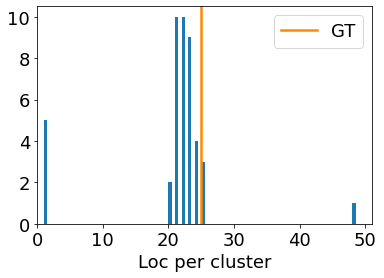

In [67]:
plt.rcParams.update({'font.size': 18})
print('Graphic')
binwidth = 0.5
lim = max(LocPerCluster) + 3
plt.hist(LocPerCluster, bins=np.arange(0, lim + binwidth, binwidth))
GT_loc = 25
plt.axvline(x=GT_loc, label='GT'.format(GT), c='DarkOrange', linewidth=2.5)
plt.xlabel('Loc per cluster')
plt.xlim([0, lim])
plt.legend()
plt.show()

In [68]:
# Tomato : 
labs = tomato_result_1['x']
LocPerCluster = []
LocInNoise = []
for clus in labs.unique():
        if clus != 0:
            LocPerCluster.append(len(labs[(labs==clus)]))
        if clus == 0:
            LocInNoise.append(len(labs[(labs==clus)]))

Tomato


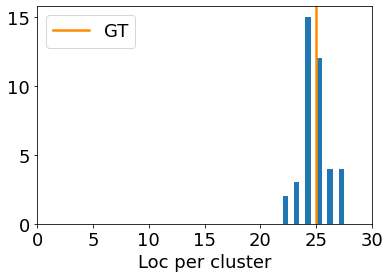

In [69]:
plt.rcParams.update({'font.size': 18})
print('Tomato')
binwidth = 0.5
lim = max(LocPerCluster) + 3
plt.hist(LocPerCluster, bins=np.arange(0, lim + binwidth, binwidth))
GT_loc = 25
plt.axvline(x=GT_loc, label='GT'.format(GT), c='DarkOrange', linewidth=2.5)
plt.xlabel('Loc per cluster')
plt.xlim([0, lim])
plt.legend()
plt.show()

528


In [17]:
labs

0       16.0
1       16.0
2       16.0
3       16.0
4       16.0
        ... 
1495     0.0
1496     0.0
1497     0.0
1498     0.0
1499     0.0
Name: graphic_labels, Length: 1500, dtype: float64